# PCA in Python

* We will find the principal components in our data using the PCA function in statsmodels.
* In this example, we will be using a breast cancer dataset from the UCI data repository.
* This data contains 35 columns, we will retain 31 numeric columns and find the top 2 principal components of our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']

In [3]:
breast_cancer = pd.read_csv('./data/breast-cancer.csv', names = total_cols)
breast_cancer.head()

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [4]:
breast_cancer.shape

(198, 35)

* Now we will extract only the numeric columns and find the principal components using the PCA function. 
* For this example, we will limit ourselves to only 2 components.

In [5]:
# To select all *numeric* types, use ``np.number`` or ``'number'``
breast_cancer_numeric = breast_cancer.select_dtypes(include='number')
breast_cancer_numeric

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0
194,943471,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5
195,94547,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7
196,947204,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0


In [6]:
from  sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(breast_cancer_numeric)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.components_

array([[ 1.00000000e+00, -1.61396906e-06,  9.56400948e-08,
         5.60158595e-08,  6.51539913e-07,  8.54665690e-06,
        -1.72524554e-10,  1.02774428e-09,  1.26892327e-09,
         8.72041768e-10, -4.10872121e-10,  6.14174847e-11,
         1.32171058e-09,  6.83914556e-09,  2.10450825e-08,
         8.09167607e-08,  1.27696476e-10,  6.15380952e-10,
         8.60825140e-10,  3.02016001e-10,  3.31828092e-10,
         1.02538579e-10,  4.68496342e-08,  1.51748774e-08,
         4.31015471e-07,  1.71419477e-06, -4.35967029e-10,
         2.86498324e-10,  2.60150098e-09,  9.33665248e-10,
        -1.40277065e-09,  2.31125031e-11, -8.90883534e-08],
       [-5.79145330e-06, -1.42775665e-02,  4.36695269e-03,
         7.94555769e-04,  2.94673649e-02,  4.96559305e-01,
        -2.15627496e-06,  1.25075128e-05,  4.62637533e-05,
         3.16432499e-05, -2.13447144e-06, -3.70105654e-06,
         3.03825202e-04, -1.11036699e-06,  2.06530078e-03,
         5.65636953e-02, -4.94559930e-07, -4.91025993e-

In [9]:
pca.explained_variance_ratio_

array([9.99999943e-01, 5.44445202e-08])

In [10]:
pca.transform(breast_cancer_numeric)

array([[-1.87095582e+06,  5.93643493e+01],
       [-1.98204582e+06,  5.64299391e+02],
       [-1.14795181e+06,  6.78232357e+02],
       [-1.14698582e+06, -1.01354386e+03],
       [-1.14688481e+06,  3.18756323e+02],
       [-1.14668282e+06, -8.11148579e+02],
       [-1.14610982e+06,  2.39799991e+02],
       [-1.14588682e+06, -6.30746211e+02],
       [-1.14548782e+06, -7.98314510e+02],
       [-1.14545882e+06, -8.44103198e+02],
       [-1.14483282e+06, -3.03147850e+02],
       [-1.14436882e+06, -1.81378525e+02],
       [-1.14408782e+06, -5.47704327e+02],
       [-1.14247882e+06, -5.50341641e+02],
       [-1.14206282e+06, -3.69780977e+02],
       [-1.14184882e+06, -1.56925309e+02],
       [ 6.52066418e+06, -5.38355311e+02],
       [-1.13895981e+06,  1.27274112e+03],
       [-1.13791682e+06,  6.76918455e+02],
       [-1.13783782e+06,  2.84496562e+01],
       [-1.13770582e+06, -5.99012493e+02],
       [-1.13768782e+06,  6.84089727e+01],
       [-1.13749582e+06, -2.30541580e+02],
       [-1.

In [11]:
pca1 = pca.transform(breast_cancer_numeric)[0]
pca2 = pca.transform(breast_cancer_numeric)[1]

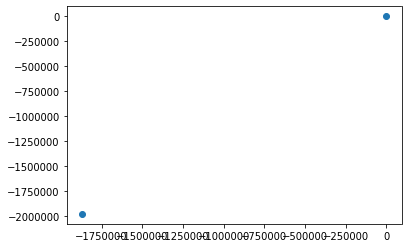

In [12]:
plt.scatter(pca1, pca2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
breast_cancer_numeric_std = scaler.fit_transform(breast_cancer_numeric)

In [16]:
pca.fit(breast_cancer_numeric_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[ 0.03083887, -0.06927806,  0.22132786,  0.02151091,  0.23672197,
         0.22450356,  0.13115305,  0.23562369,  0.28135249,  0.28904854,
         0.13912865,  0.08248844,  0.22691373,  0.07581716,  0.2367241 ,
         0.23601491,  0.08829825,  0.18041838,  0.20127632,  0.1790614 ,
         0.11596936,  0.15669118,  0.22248521, -0.01713815,  0.24091069,
         0.21709494,  0.03367257,  0.11945745,  0.16736987,  0.23382743,
         0.03959864,  0.04473521,  0.01571355],
       [ 0.00097477,  0.11973237, -0.22392968, -0.06145386, -0.20558555,
        -0.22333924,  0.22347484,  0.19959374,  0.09297218,  0.00314174,
         0.19931904,  0.30006522, -0.13839182, -0.01348024, -0.12200923,
        -0.16611657,  0.08436293,  0.18960189,  0.13505374,  0.03290466,
         0.10971392,  0.20607449, -0.2093457 , -0.00352388, -0.18720695,
        -0.20798429,  0.24165249,  0.24914244,  0.20776714,  0.11379926,
         0.21215913,  0.29038335, -0.06803244]])

In [18]:
pca.components_

array([[ 0.03083887, -0.06927806,  0.22132786,  0.02151091,  0.23672197,
         0.22450356,  0.13115305,  0.23562369,  0.28135249,  0.28904854,
         0.13912865,  0.08248844,  0.22691373,  0.07581716,  0.2367241 ,
         0.23601491,  0.08829825,  0.18041838,  0.20127632,  0.1790614 ,
         0.11596936,  0.15669118,  0.22248521, -0.01713815,  0.24091069,
         0.21709494,  0.03367257,  0.11945745,  0.16736987,  0.23382743,
         0.03959864,  0.04473521,  0.01571355],
       [ 0.00097477,  0.11973237, -0.22392968, -0.06145386, -0.20558555,
        -0.22333924,  0.22347484,  0.19959374,  0.09297218,  0.00314174,
         0.19931904,  0.30006522, -0.13839182, -0.01348024, -0.12200923,
        -0.16611657,  0.08436293,  0.18960189,  0.13505374,  0.03290466,
         0.10971392,  0.20607449, -0.2093457 , -0.00352388, -0.18720695,
        -0.20798429,  0.24165249,  0.24914244,  0.20776714,  0.11379926,
         0.21215913,  0.29038335, -0.06803244]])

In [19]:
pca.explained_variance_ratio_

array([0.29802187, 0.25187996])

In [20]:
pca1 = pca.transform(breast_cancer_numeric_std)[0]
pca2 = pca.transform(breast_cancer_numeric_std)[1]

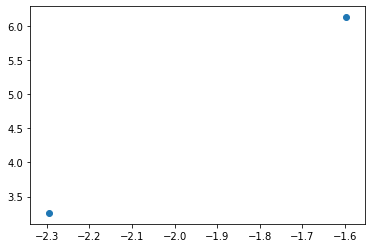

In [21]:
plt.scatter(pca1, pca2)